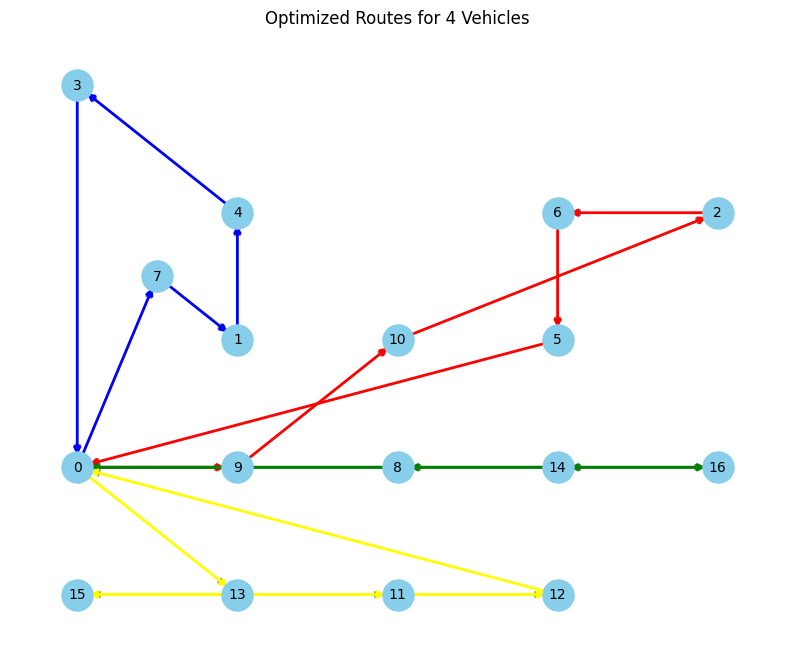

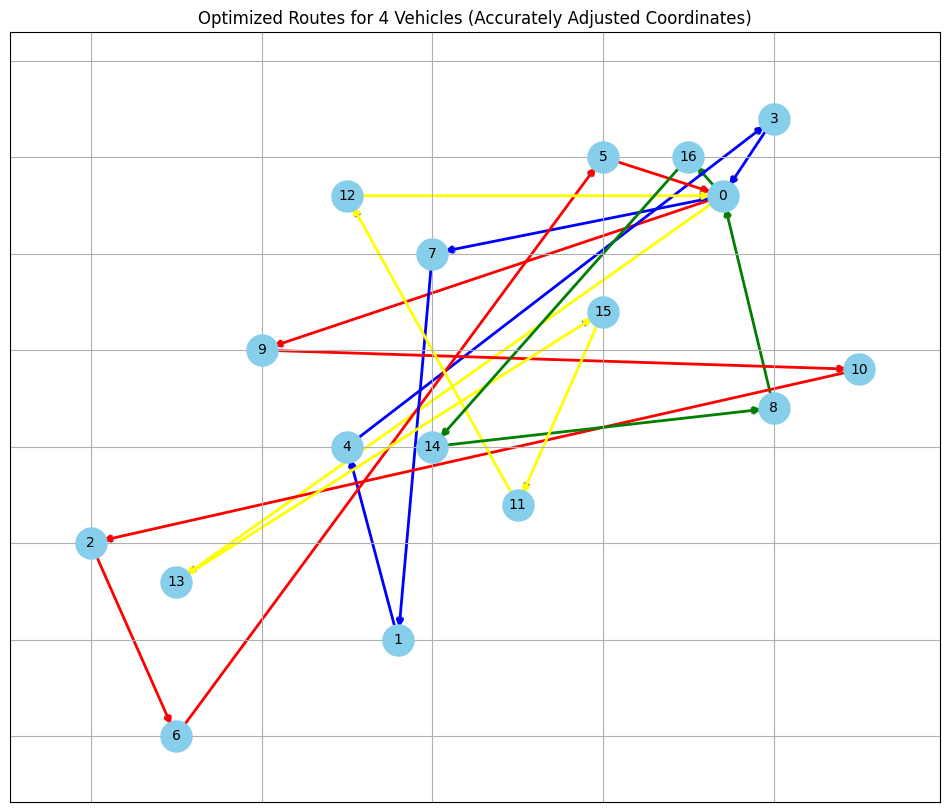

In [11]:
import matplotlib.pyplot as plt
import networkx as nx

# Data for each route and corresponding vehicle color
routes = {
    'vehicle_0': {'path': [0, 9, 10, 2, 6, 5, 0], 'color': 'red', 'distance': 1712},
    'vehicle_1': {'path': [0, 16, 14, 8, 0], 'color': 'green', 'distance': 1484},
    'vehicle_2': {'path': [0, 7, 1, 4, 3, 0], 'color': 'blue', 'distance': 1552},
    'vehicle_3': {'path': [0, 13, 15, 11, 12, 0], 'color': 'yellow', 'distance': 1552},
}

# Create a graph
G = nx.DiGraph()

# Add nodes and edges with specific attributes
node_positions = {
    0: (0, 0), 1: (1, 1), 2: (4, 2), 3: (0, 3), 4: (1, 2), 5: (3, 1), 6: (3, 2), 
    7: (0.5, 1.5), 8: (2, 0), 9: (1, 0), 10: (2, 1), 11: (2, -1), 12: (3, -1), 
    13: (1, -1), 14: (3, 0), 15: (0, -1), 16: (4, 0)
}

node_positions_accurate = {
    0: (37.577, 126.988),
    1: (37.558, 126.965),
    2: (37.540, 126.970),
    3: (37.580, 126.992),
    4: (37.555, 126.975),
    5: (37.570, 126.990),
    6: (37.545, 126.960),
    7: (37.560, 126.985),
    8: (37.580, 126.977),
    9: (37.550, 126.980),
    10: (37.585, 126.979),
    11: (37.565, 126.972),
    12: (37.555, 126.988),
    13: (37.545, 126.968),
    14: (37.560, 126.975),
    15: (37.570, 126.982),
    16: (37.575, 126.990)
    # 0: (5, 5), 1: (2, 7), 2: (8, 9), 3: (0, 6), 4: (1, 7), 5: (6, 8), 6: (7, 8),
    # 7: (3, 6), 8: (6, 3), 9: (5, 4), 10: (7, 3), 11: (5, 1), 12: (7, 1),
    # 13: (3, 2), 14: (8, 3), 15: (2, 0), 16: (9, 1)
}
# Add nodes to the graph
for node, pos in node_positions.items():
    G.add_node(node, pos=pos)

# Add edges to the graph with specific colors for each vehicle route
for vehicle, data in routes.items():
    path = data['path']
    for i in range(len(path) - 1):
        G.add_edge(path[i], path[i + 1], color=data['color'], weight=2)

# Node size
node_size = 500

# Draw the graph
plt.figure(figsize=(10, 8))
# Draw all nodes
nx.draw_networkx_nodes(G, pos=node_positions, node_color='skyblue', node_size=node_size)
# Draw all edges in light grey to form a base layer
nx.draw_networkx_edges(G, pos=node_positions, edge_color='grey', node_size=node_size, arrowstyle='-|>', arrowsize=10)
# Draw colored edges for each vehicle path
for edge in G.edges(data=True):
    nx.draw_networkx_edges(G, pos=node_positions, edgelist=[(edge[0], edge[1])], width=2,
                           edge_color=edge[2]['color'], arrowstyle='-|>', arrowsize=10)
# Labels
nx.draw_networkx_labels(G, pos=node_positions, font_size=10, font_color='black')
plt.title('Optimized Routes for 4 Vehicles')
plt.grid('on')  # Added grid for better alignment visibility
plt.axis('off')  # Turn off the axis
plt.show()


# Draw the graph with accurately adjusted node positions
plt.figure(figsize=(12, 10))
# Draw all nodes
nx.draw_networkx_nodes(G, pos=node_positions_accurate, node_color='skyblue', node_size=node_size)
# Draw all edges in light grey to form a base layer
nx.draw_networkx_edges(G, pos=node_positions_accurate, edge_color='grey', node_size=node_size, arrowstyle='-|>', arrowsize=10)
# Draw colored edges for each vehicle path
for edge in G.edges(data=True):
    nx.draw_networkx_edges(G, pos=node_positions_accurate, edgelist=[(edge[0], edge[1])], width=2,
                           edge_color=edge[2]['color'], arrowstyle='-|>', arrowsize=10)
# Labels
nx.draw_networkx_labels(G, pos=node_positions_accurate, font_size=10, font_color='black')
plt.title('Optimized Routes for 4 Vehicles (Accurately Adjusted Coordinates)')
plt.grid('on')  # Added grid for better alignment visibility
plt.axis('on')  # Turn on the axis for reference
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx

# Data for each route and corresponding vehicle color
routes = {
    'vehicle_0': {'path': [0, 9, 10, 2, 6, 5, 0], 'color': 'red', 'distance': 1712},
    'vehicle_1': {'path': [0, 16, 14, 8, 0], 'color': 'green', 'distance': 1484},
    'vehicle_2': {'path': [0, 7, 1, 4, 3, 0], 'color': 'blue', 'distance': 1552},
    'vehicle_3': {'path': [0, 13, 15, 11, 12, 0], 'color': 'yellow', 'distance': 1552},
}

# Create a graph
G = nx.DiGraph()

# Add nodes and edges with specific attributes
node_positions = {
    0: (0, 0), 1: (1, 1), 2: (4, 2), 3: (0, 3), 4: (1, 2), 5: (3, 1), 6: (3, 2), 
    7: (0.5, 1.5), 8: (2, 0), 9: (1, 0), 10: (2, 1), 11: (2, -1), 12: (3, -1), 
    13: (1, -1), 14: (3, 0), 15: (0, -1), 16: (4, 0)
}

node_positions_accurate = {
    0: (37.577, 126.988),
    1: (37.558, 126.965),
    2: (37.540, 126.970),
    3: (37.580, 126.992),
    4: (37.555, 126.975),
    5: (37.570, 126.990),
    6: (37.545, 126.960),
    7: (37.560, 126.985),
    8: (37.580, 126.977),
    9: (37.550, 126.980),
    10: (37.585, 126.979),
    11: (37.565, 126.972),
    12: (37.555, 126.988),
    13: (37.545, 126.968),
    14: (37.560, 126.975),
    15: (37.570, 126.982),
    16: (37.575, 126.990)
}
# Add nodes to the graph
for node, pos in node_positions.items():
    G.add_node(node, pos=pos)

# Add edges to the graph with specific colors for each vehicle route
for vehicle, data in routes.items():
    path = data['path']
    for i in range(len(path) - 1):
        G.add_edge(path[i], path[i + 1], color=data['color'], weight=2)

# Node size
node_size = 500

# Draw the graph
plt.figure(figsize=(10, 8))
# Draw all nodes
nx.draw_networkx_nodes(G, pos=node_positions, node_color='skyblue', node_size=node_size)
# Draw all edges in light grey to form a base layer
nx.draw_networkx_edges(G, pos=node_positions, edge_color='grey', node_size=node_size, arrowstyle='-|>', arrowsize=10)
# Draw colored edges for each vehicle path
for edge in G.edges(data=True):
    nx.draw_networkx_edges(G, pos=node_positions, edgelist=[(edge[0], edge[1])], width=2,
                           edge_color=edge[2]['color'], arrowstyle='-|>', arrowsize=10)
# Labels
nx.draw_networkx_labels(G, pos=node_positions, font_size=10, font_color='black')
plt.title('Optimized Routes for 4 Vehicles')
plt.grid('on')  # Added grid for better alignment visibility
plt.axis('off')  # Turn off the axis
plt.show()


# Draw the graph with accurately adjusted node positions
plt.figure(figsize=(12, 10))
# Draw all nodes
nx.draw_networkx_nodes(G, pos=node_positions_accurate, node_color='skyblue', node_size=node_size)
# Draw all edges in light grey to form a base layer
nx.draw_networkx_edges(G, pos=node_positions_accurate, edge_color='grey', node_size=node_size, arrowstyle='-|>', arrowsize=10)
# Draw colored edges for each vehicle path
for edge in G.edges(data=True):
    nx.draw_networkx_edges(G, pos=node_positions_accurate, edgelist=[(edge[0], edge[1])], width=2,
                           edge_color=edge[2]['color'], arrowstyle='-|>', arrowsize=10)
# Labels
nx.draw_networkx_labels(G, pos=node_positions_accurate, font_size=10, font_color='black')
plt.title('Optimized Routes for 4 Vehicles (Accurately Adjusted Coordinates)')
plt.grid('on')  # Added grid for better alignment visibility
plt.axis('on')  # Turn on the axis for reference
plt.show()

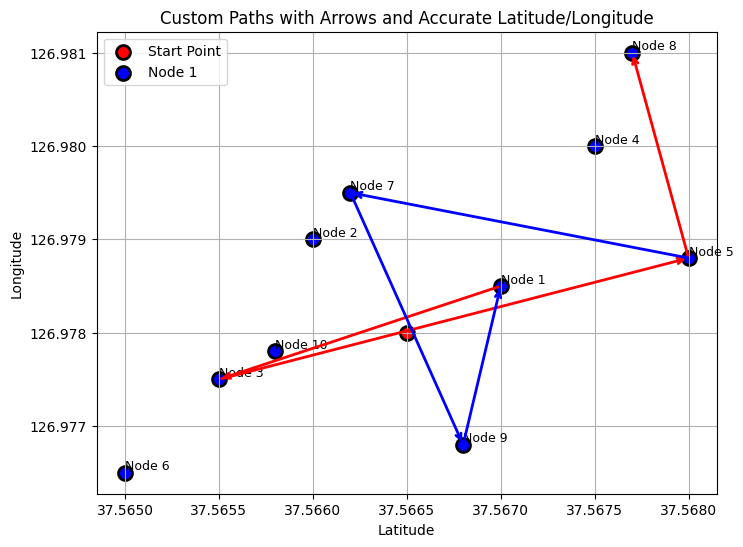

In [22]:
import matplotlib.pyplot as plt

# 시작점과 10개의 노드의 위도 경도를 설정
start_point = (37.5665, 126.9780)  # 예시로 서울의 위도와 경도
nodes = [
    (37.567, 126.9785), (37.566, 126.979), (37.5655, 126.9775), 
    (37.5675, 126.9800), (37.568, 126.9788), (37.565, 126.9765), 
    (37.5662, 126.9795), (37.5677, 126.9810), (37.5668, 126.9768), 
    (37.5658, 126.9778)
]

# 위도와 경도를 그대로 사용한 좌표 평면 그래프
plt.figure(figsize=(8, 6))

# 시작점과 모든 노드 플로팅 (동그라미로 표시)
plt.scatter(*start_point, color='red', label='Start Point', s=100, edgecolor='black', linewidth=2, marker='o')  
for i, node in enumerate(nodes):
    plt.scatter(*node, color='blue', label=f'Node {i+1}' if i == 0 else "", s=100, edgecolor='black', linewidth=2, marker='o')
    plt.text(node[0], node[1], f'Node {i+1}', fontsize=9, verticalalignment='bottom')

# 0 -> 2 -> 4 -> 7 순서로 빨간색 화살표 추가
path1 = [0, 2, 4, 7]
for i in range(len(path1) - 1):
    node_start = nodes[path1[i]]
    node_end = nodes[path1[i+1]]
    plt.annotate('', xy=node_end, xytext=node_start,
                 arrowprops=dict(color='red', arrowstyle='->', lw=2))

# 4 -> 6 -> 8 -> 0 순서로 파란색 화살표 추가
path2 = [4, 6, 8, 0]
for i in range(len(path2) - 1):
    node_start = nodes[path2[i]]
    node_end = nodes[path2[i+1]]
    plt.annotate('', xy=node_end, xytext=node_start,
                 arrowprops=dict(color='blue', arrowstyle='->', lw=2))

# 축 레이블 설정 (위도와 경도 그대로 사용)
plt.xlabel("Latitude")
plt.ylabel("Longitude")

# 지수 표기법 제거
plt.ticklabel_format(useOffset=False, style='plain')

# 범례 추가
plt.legend()

# 제목 추가
plt.title("Custom Paths with Arrows and Accurate Latitude/Longitude")

# 그래프 출력
plt.grid(True)
plt.show()


In [23]:
import folium

# 지도 초기 설정 (시작점 기준)
start_point = (37.5665, 126.9780)  # 서울의 위도와 경도

# 지도 객체 생성
m = folium.Map(location=start_point, zoom_start=15)

# 시작점 마커 추가
folium.Marker(start_point, popup="Start Point", icon=folium.Icon(color='red')).add_to(m)

# 노드 마커 추가
for i, node in enumerate(nodes):
    folium.Marker(node, popup=f"Node {i+1}", icon=folium.Icon(color='blue')).add_to(m)

# 0 -> 2 -> 4 -> 7 경로 그리기 (빨간색)
path1_coords = [nodes[0], nodes[2], nodes[4], nodes[7]]
folium.PolyLine(path1_coords, color="red", weight=2.5, opacity=1).add_to(m)

# 4 -> 6 -> 8 -> 0 경로 그리기 (파란색)
path2_coords = [nodes[4], nodes[6], nodes[8], nodes[0]]
folium.PolyLine(path2_coords, color="blue", weight=2.5, opacity=1).add_to(m)

# 지도 파일로 저장
m.save("/mnt/data/map_with_nodes.html")

m


ModuleNotFoundError: No module named 'folium'